In [2]:
#Imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [3]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.322266
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,287.923645
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,287.814392


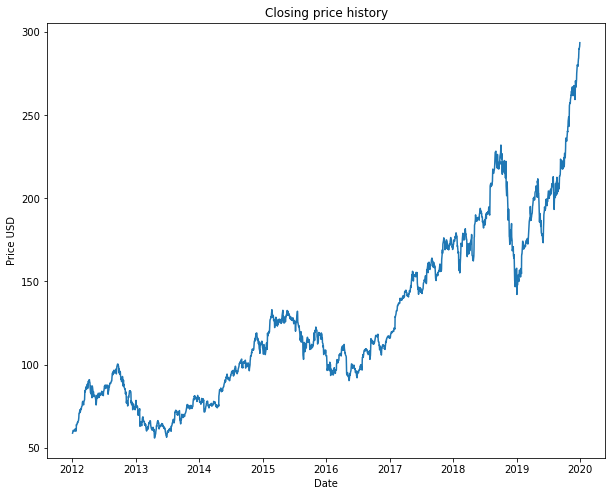

In [4]:
#Visualize the closing price history
plt.figure(figsize=(10, 8))
plt.title("Closing price history")
plt.plot(df.Close)
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.show()

In [5]:
#Create a new dataframe with only the Close column
data = df[['Close']]
#Convert to numpy array
dataset = data.values

dataset

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [289.79998779],
       [291.51998901],
       [293.6499939 ]])

In [6]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(dataset)
scaled_df

array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [7]:
#Create training data
train_len = int(len(df) * 0.8)
train_data = scaled_df[0: train_len, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [8]:
#X_train

In [9]:
#y_train

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1549, 60, 1)

In [12]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1549/1549 [==============================] - 33s 21ms/step - loss: 9.3493e-04


In [15]:
#Create testing data
test_data = scaled_df[train_len-60:, :]

X_test = []
y_test = dataset[train_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [16]:
#Convert to numpy array
X_test = np.array(X_test)

#Reshape

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
#Predictions

yhat = model.predict(X_test)
yhat = scaler.inverse_transform(yhat)


In [18]:
#Evaluation of model
rmse = np.sqrt(np.mean(yhat - y_test)**2)
rmse

16.564564934439456

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


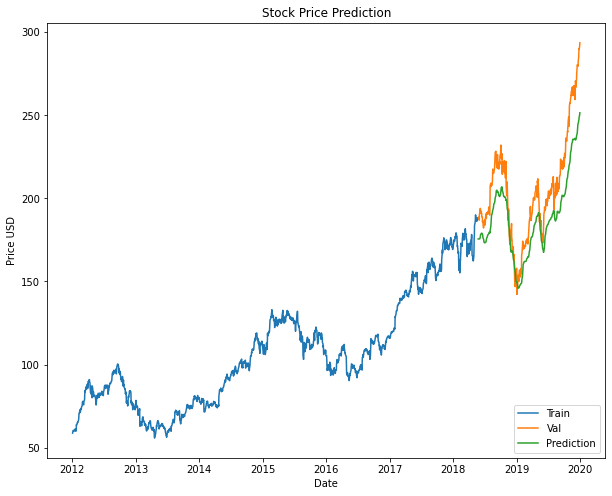

In [19]:
#Plot the data
train = data[: train_len]
valid = data[train_len: ]
valid['Predictions'] = yhat

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
#Show actual and predicted price
valid

,Close,Predictions
Date,,
2018-05-25,188.580002,175.560226
2018-05-29,187.899994,175.634613
2018-05-30,187.500000,175.675537
2018-05-31,186.869995,175.664276
2018-06-01,190.240005,175.574524
...,...,...
2019-12-24,284.269989,246.577240
2019-12-26,289.910004,247.536880
2019-12-27,289.799988,248.848511


In [21]:
#Check predicted price and actual price on 1 Jan, 2020
apple_data = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')

new_df = apple_data[['Close']]

last_60 = new_df[-60:].values

#Scale data

last_60_scaled = scaler.transform(last_60)

X_test_new = []

X_test_new.append(last_60_scaled)

#convert to numpy array
X_test_new = np.array(X_test_new)

X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))

#Get predictions

pred = model.predict(X_test_new)

#undo scaling

pred = scaler.inverse_transform(pred)
pred

array([[252.86652]], dtype=float32)

In [22]:
actual = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2020-01-02')

In [23]:
actual.Close.values

array([300.3500061])